# Grop Racommander

## Import the dataset using in the slim version


In [31]:
import pandas as pd


In [32]:
ratings_df = pd.read_csv("XWines_Full_21M_ratings.csv") 
display(ratings_df.head(10))

C:\Users\Lorenzo\AppData\Local\Temp\ipykernel_18884\3114394609.py:1: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  ratings_df = pd.read_csv("XWines_Full_21M_ratings.csv")


,RatingID,UserID,WineID,Vintage,Rating,Date
0,1,1604441,136103,1950,4.0,2019-10-14 11:20:52
1,2,1291483,136103,1950,5.0,2019-11-28 03:36:33
2,3,1070605,104036,1950,5.0,2017-12-28 10:15:55
3,4,1080181,144864,1950,5.0,2016-06-23 02:16:22
4,5,1834379,111430,1950,5.0,2021-05-16 17:58:14
5,6,1995440,157985,1950,4.0,2016-01-06 22:14:14
6,7,1166181,101794,1950,5.0,2018-04-15 12:04:46
7,8,1839846,136103,1950,5.0,2020-07-18 15:41:19
8,9,1693747,136103,1950,1.0,2018-11-23 01:48:57
9,10,1478537,135897,1950,4.0,2015-05-04 19:52:09


In [33]:
ratings_df = ratings_df.drop(columns=['Vintage', 'Date'])
display(ratings_df.head(10))

,RatingID,UserID,WineID,Rating
0,1,1604441,136103,4.0
1,2,1291483,136103,5.0
2,3,1070605,104036,5.0
3,4,1080181,144864,5.0
4,5,1834379,111430,5.0
5,6,1995440,157985,4.0
6,7,1166181,101794,5.0
7,8,1839846,136103,5.0
8,9,1693747,136103,1.0
9,10,1478537,135897,4.0


In [34]:
wine_df = pd.read_csv('XWines_Full_100K_wines.csv', index_col="WineID")
display(wine_df.head(5))
print(wine_df.columns)

,WineName,Type,Elaborate,Grapes,Harmonize,ABV,Body,Acidity,Code,Country,RegionID,RegionName,WineryID,WineryName,Website,Vintages
WineID,,,,,,,,,,,,,,,,
100001,Espumante Moscatel,Sparkling,Varietal/100%,['Muscat/Moscato'],"['Pork', 'Rich Fish', 'Shellfish']",7.5,Medium-bodied,High,BR,Brazil,1001,Serra Gaúcha,10001,Casa Perini,http://www.vinicolaperini.com.br,"[2020, 2019, 2018, 2017, 2016, 2015, 2014, 201..."
100002,Ancellotta,Red,Varietal/100%,['Ancellotta'],"['Beef', 'Barbecue', 'Codfish', 'Pasta', 'Pizz...",12.0,Medium-bodied,Medium,BR,Brazil,1001,Serra Gaúcha,10001,Casa Perini,http://www.vinicolaperini.com.br,"[2016, 2015, 2014, 2013, 2012, 2011, 2010, 200..."
100003,Cabernet Sauvignon,Red,Varietal/100%,['Cabernet Sauvignon'],"['Beef', 'Lamb', 'Poultry']",12.0,Full-bodied,High,BR,Brazil,1001,Serra Gaúcha,10002,Castellamare,https://www.emporiocastellamare.com.br,"[2021, 2020, 2019, 2018, 2017, 2016, 2015, 201..."
100004,Virtus Moscato,White,Varietal/100%,['Muscat/Moscato'],['Sweet Dessert'],12.0,Medium-bodied,Medium,BR,Brazil,1001,Serra Gaúcha,10003,Monte Paschoal,http://www.montepaschoal.com.br,"[2021, 2020, 2019, 2018, 2017, 2016, 2015, 201..."
100005,Maison de Ville Cabernet-Merlot,Red,Assemblage/Bordeaux Red Blend,"['Cabernet Sauvignon', 'Merlot']","['Beef', 'Lamb', 'Game Meat', 'Poultry']",11.0,Full-bodied,Medium,BR,Brazil,1001,Serra Gaúcha,10000,Aurora,http://www.vinicolaaurora.com.br,"[2021, 2020, 2019, 2018, 2017, 2016, 2015, 201..."


Index(['WineName', 'Type', 'Elaborate', 'Grapes', 'Harmonize', 'ABV', 'Body',
       'Acidity', 'Code', 'Country', 'RegionID', 'RegionName', 'WineryID',
       'WineryName', 'Website', 'Vintages'],
      dtype='object')


#### 2. Preprocessing


We have decided to remove all the wine that lees than 10 ratings and all the users tried less than 10 wines.

In [35]:
# Check number of ratings per WineID
rating_per_WineID_df = ratings_df.groupby(['WineID']).count().sort_values(by="Rating", ascending=False)
display(rating_per_WineID_df)

# Check number of ratings per user
rating_per_user_df = ratings_df.groupby(['UserID']).count().sort_values(by="Rating", ascending=False)
display(rating_per_user_df)

,RatingID,UserID,Rating
WineID,,,
155289,27415,27415,27415
179010,23626,23626,23626
179011,21216,21216,21216
111391,20913,20913,20913
167418,20817,20817,20817
...,...,...,...
191683,5,5,5
191682,5,5,5
191681,5,5,5


,RatingID,WineID,Rating
UserID,,,
1084433,2986,2986,2986
1034989,2979,2979,2979
1070878,2613,2613,2613
1048267,2597,2597,2597
1160536,2392,2392,2392
...,...,...,...
1979157,5,5,5
1096801,5,5,5
1537952,5,5,5


In [36]:
min_ratings_per_WineID = 1000 
min_ratings_per_user = 200



In [37]:
# select WineIDs with the desidered number of ratings
selected_WineIDs = list(rating_per_WineID_df.loc[rating_per_WineID_df['Rating'] >= min_ratings_per_WineID].reset_index()['WineID'])
display(ratings_df.shape)
selected_ratings_df = ratings_df.loc[ratings_df['WineID'].isin(selected_WineIDs)]
display(selected_ratings_df.shape)

# Check number of ratings per WineID
rating_per_WineID_df = selected_ratings_df.groupby(['WineID']).count().sort_values(by="Rating", ascending=False)
display(rating_per_WineID_df)

# Check number of ratings per user
rating_per_user_df = selected_ratings_df.groupby(['UserID']).count().sort_values(by="Rating", ascending=False)
display(rating_per_user_df)

(21013536, 4)

(8630733, 4)

,RatingID,UserID,Rating
WineID,,,
155289,27415,27415,27415
179010,23626,23626,23626
179011,21216,21216,21216
111391,20913,20913,20913
167418,20817,20817,20817
...,...,...,...
167821,1000,1000,1000
162823,1000,1000,1000
179583,1000,1000,1000


,RatingID,WineID,Rating
UserID,,,
1070878,775,775,775
1048267,719,719,719
1006657,629,629,629
1064787,623,623,623
1863413,619,619,619
...,...,...,...
1068412,1,1,1
1309230,1,1,1
1974052,1,1,1


In [38]:
# select users with the desidered number of ratings
selected_users = list(rating_per_user_df.loc[rating_per_user_df['Rating'] >= min_ratings_per_user].reset_index()['UserID'])
display(selected_ratings_df.shape)
selected_ratings_df = selected_ratings_df.loc[ratings_df['UserID'].isin(selected_users)]
display(selected_ratings_df.shape)

# Check number of ratings per WineID
rating_per_WineID_df = selected_ratings_df.groupby(['WineID']).count().sort_values(by="Rating", ascending=False)
display(rating_per_WineID_df)

# Check number of ratings per user
rating_per_user_df = selected_ratings_df.groupby(['UserID']).count().sort_values(by="Rating", ascending=False)
display(rating_per_user_df)

(8630733, 4)

(202468, 4)

,RatingID,UserID,Rating
WineID,,,
155290,412,412,412
111391,391,391,391
155289,355,355,355
135826,336,336,336
162497,320,320,320
...,...,...,...
179263,1,1,1
167768,1,1,1
106542,1,1,1


,RatingID,WineID,Rating
UserID,,,
1070878,775,775,775
1048267,719,719,719
1006657,629,629,629
1064787,623,623,623
1863413,619,619,619
...,...,...,...
1209281,200,200,200
1209805,200,200,200
1227423,200,200,200


## 3. Group Generation
#### 3.1 Similarity metric

We calculated the Pearson Similarity.

In [39]:
# computing pearson similarity between each pair of users

import numpy as np

ratings_df = selected_ratings_df

user_matrix = ratings_df.pivot_table(columns='WineID', index='UserID', values='Rating')

user_id_set = set(ratings_df['UserID'])
user_id_indexes = user_matrix.index.values
display(type(user_id_indexes))
user_matrix = user_matrix.fillna(0)
numpy_array = user_matrix.to_numpy()
sim_matrix = np.corrcoef(numpy_array)

display(user_matrix)
display(sim_matrix)

numpy.ndarray

WineID,100001,100006,100009,100010,100011,100012,100014,100021,100024,100026,...,193576,193577,193578,193579,193580,193581,193582,193583,193584,193585
UserID,,,,,,,,,,,,,,,,,,,,,
1000004,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1000010,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1000025,3.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,3.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1000045,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.5,4.5,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1000049,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1967501,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,3.0,0.0,0.0,0.0,2.5,0.0,0.0,0.0
1978784,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2010314,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


array([[ 1.        ,  0.06074648,  0.06345183, ...,  0.02634737,
        -0.0198144 ,  0.10362233],
       [ 0.06074648,  1.        ,  0.17047188, ...,  0.0690307 ,
         0.09064869,  0.11906332],
       [ 0.06345183,  0.17047188,  1.        , ...,  0.09610352,
         0.10812832,  0.12340924],
       ...,
       [ 0.02634737,  0.0690307 ,  0.09610352, ...,  1.        ,
         0.10515132, -0.00215061],
       [-0.0198144 ,  0.09064869,  0.10812832, ...,  0.10515132,
         1.        , -0.01104065],
       [ 0.10362233,  0.11906332,  0.12340924, ..., -0.00215061,
        -0.01104065,  1.        ]])

Text(0.5, 0, "Pearson's Correlation Coeficient")

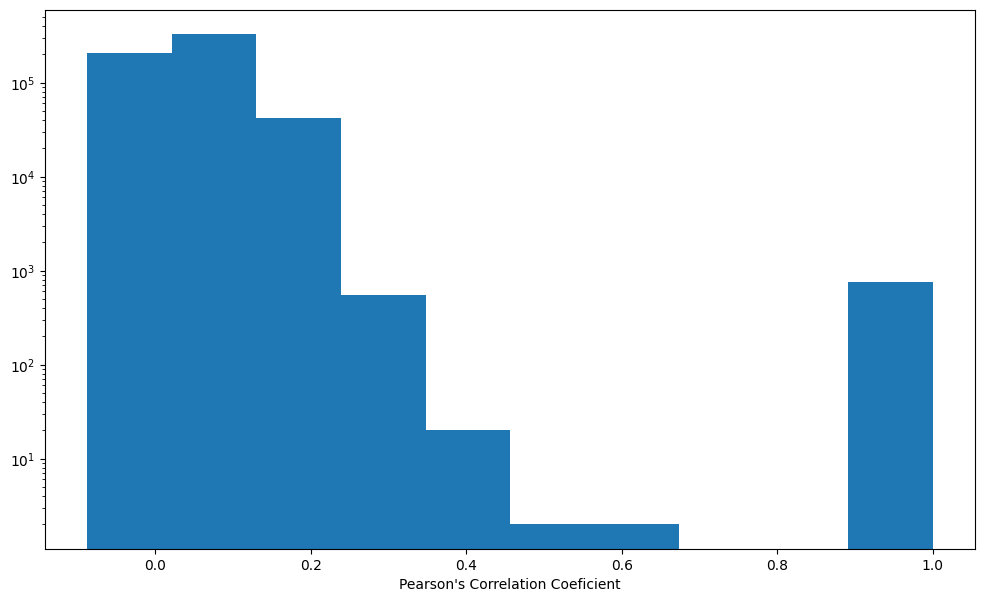

In [40]:
# visualizing similarity distributions

%matplotlib inline
import matplotlib.pyplot as plt

plt.hist(sim_matrix.flatten())
plt.yscale("log")
plt.xlabel("Pearson's Correlation Coeficient")

#### 3.2 Group Generation

We separatly generated 20 groups for sizes 2,3,4,5,6,7,8 based on RANDOM and SIMILAR

In [41]:
from importlib import reload

import groups_generators as groups_gen_utils
reload(groups_gen_utils)
import groups_generators as groups_gen_utils

#group_sizes_to_create = [2,4,8] 
group_sizes_to_create = [2, 3, 4, 5, 6, 7, 8]
group_similarity_to_create = [groups_gen_utils.GroupsGenerator.RANDOM,groups_gen_utils.GroupsGenerator.SIMILAR]
group_number = 20

group_list = list()
for group_to_create in group_similarity_to_create:
    grpGenerator = groups_gen_utils.GroupsGenerator.getGroupsGenerator(group_to_create)
    current_group_list = grpGenerator.generateGroups(user_id_indexes, user_id_set, sim_matrix, group_sizes_to_create, group_number)
    group_list = group_list + current_group_list

groups_df = pd.DataFrame.from_records(group_list)
group_dict = dict()
for group_id, group in zip(range(len(group_list)), group_list):
    group_dict[group_id] = group



20
40
60
80
100
120
140
20
40
60
80
100
120
140


,group_size,group_similarity,group_members,avg_similarity
0,2,random,"[1193559, 1165093]",-0.001625
1,2,random,"[1126116, 1134628]",-0.030962
2,2,random,"[1141987, 1218032]",0.022187
3,2,random,"[1008305, 1208148]",0.164701
4,2,random,"[2030179, 1009797]",0.101979
...,...,...,...,...
275,8,similar,"[1111631, 1126631, 2018416, 1251862, 1251977, ...",0.183412
276,8,similar,"[1205028, 1006433, 1159684, 1141874, 1173759, ...",0.162239
277,8,similar,"[1054915, 1002016, 1132390, 1225099, 1008716, ...",0.173420
278,8,similar,"[1243264, 1393087, 1405131, 1356572, 1007902, ...",0.150078


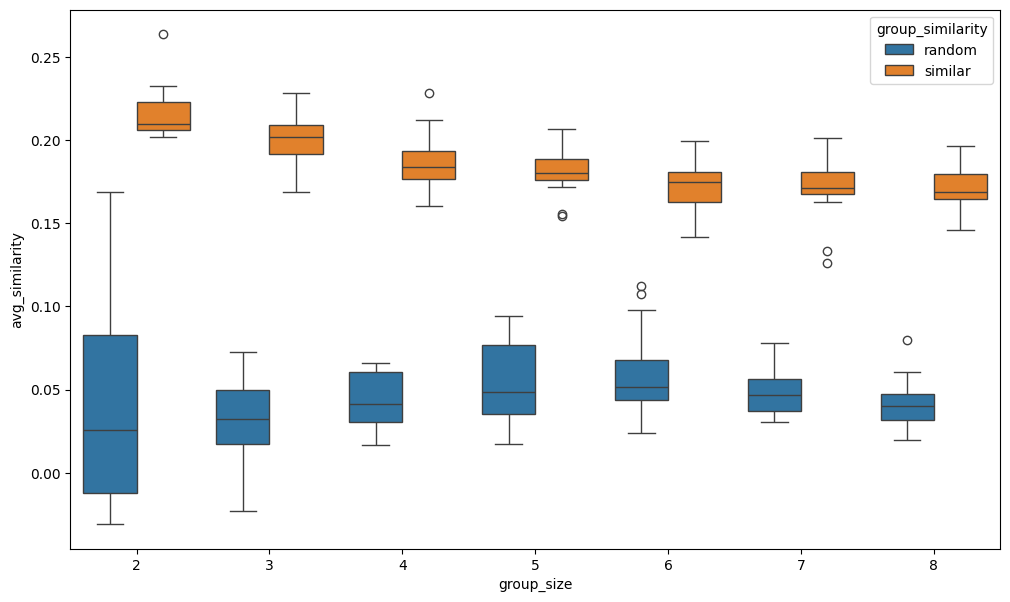

In [42]:
# Visualizing similarities for each type of group we created

import seaborn as sns


plt.rcParams["figure.figsize"] = (12,7)
sns.boxplot(x = groups_df['group_size'],
            y = groups_df['avg_similarity'],
            hue = groups_df['group_similarity'])
import matplotlib.pyplot as plt

#### 4. Train/Test split


In [43]:
ratings_df =ratings_df.rename(columns={
    'RatingID': 'ratingId',  # Fixed typo
    'UserID': 'user',
    'WineID': 'item',
    'Vintage': 'vintage',
    'Rating': 'rating',
    'Date': 'date'
})

In [44]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_fscore_support

display(ratings_df.shape)
WineIDs = set(ratings_df["item"].tolist())
users = set(ratings_df["user"].tolist())

display(len(WineIDs))
display(len(users))

train_df, test_df = train_test_split(ratings_df, test_size=0.2, stratify=ratings_df[["user"]])

display(train_df.shape)
display(train_df.head(5))
display(test_df.shape)
display(test_df.head(5))

(202468, 4)

3739

758

(161974, 4)

,ratingId,user,item,rating
2172663,2172664,1181755,162529,4.0
10974813,10974814,1156963,179232,4.0
15130135,15130136,1204342,155300,4.5
7705530,7705531,1055520,179033,4.0
15338657,15338658,1213218,111419,4.0


(40494, 4)

,ratingId,user,item,rating
1406946,1406947,1000058,111444,4.5
7268062,7268063,1239757,135893,3.0
3861842,3861843,1026089,155346,4.5
1991156,1991157,1813345,136091,3.5
17457787,17457788,1153092,155436,4.0


#### 5. Individual RS training and generating predicted ratings.



In [45]:
train_df = train_df.rename(columns={
    'RatingID': 'ratingId',  # Fixed type
    'UserID': 'user',
    'WineID': 'item',
    'Vintage': 'vintage',
    'Rating': 'rating',
    'Date': 'date'
})


In [46]:
#Individual RS

from lenskit.algorithms import Recommender
from lenskit.algorithms.user_knn import UserUser

#user_user = UserUser(3)  # Minimum (3) and maximum (15) number of neighbors to consider
user_user = UserUser(15, min_nbrs=3)  # Use up to 15 neighbors, but require at least 5
recsys = Recommender.adapt(user_user)
recsys.fit(train_df)

recsys = Recommender.adapt(user_user)
recsys.fit(train_df)
print(recsys)

TopN/UserUser(nnbrs=15, min_sim=0)


In [47]:
# Generate predicted ratings

# test_df['predicted_rating'] = recsys.predict(test_df)
test_WineID = set(test_df["item"].tolist())
test_user = set(test_df["user"].tolist())
test_rating=set(test_df["rating"].tolist())

display(len(test_WineID))
display(len(test_user))
display(len(test_rating))
display(test_rating)

3672

758

9

{1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0}

In [48]:
extended_test_df = pd.DataFrame({'item': list(test_WineID)}).merge(pd.DataFrame({'user': list(test_user)}), how='cross')
display(extended_test_df)

,item,user
0,155648,1222661
1,155648,1222662
2,155648,1003527
3,155648,1224710
4,155648,1038350
...,...,...
2783371,155647,1007597
2783372,155647,1134582
2783373,155647,1206263
2783374,155647,1169405


In [49]:
extended_test_df['rating'] = recsys.predict(extended_test_df)

display(extended_test_df)

,item,user,rating
0,155648,1222661,4.959468
1,155648,1222662,4.511302
2,155648,1003527,5.109534
3,155648,1224710,4.733648
4,155648,1038350,5.087970
...,...,...,...
2783371,155647,1007597,3.605947
2783372,155647,1134582,3.306677
2783373,155647,1206263,3.311270
2783374,155647,1169405,2.955055


#### 6. Aggregation strategies: generating group recommendations
?

In [50]:
import aggregators as aggr_utils
reload(aggr_utils)
import aggregators as aggr_utils

aggregation_strategies = ["BASE"]
recommendations_number = 10

def generate_group_recommendations_forall_groups(test_df, group_dict, recommendations_number):
    group_recommendations = dict()
    for group_id in group_dict:
        
#         print(datetime.now(), group_id)
        
        # extract group info
        group = group_dict[group_id]
        group_size = group['group_size']
        group_similarity = group['group_similarity']
        group_members = group['group_members']
            
        group_ratings = test_df.loc[test_df['user'].isin(group_members)]
        
        group_rec = dict()
        for aggregation_strategy in aggregation_strategies:
            agg = aggr_utils.AggregationStrategy.getAggregator(aggregation_strategy)
            group_rec = {**group_rec, **agg.generate_group_recommendations_for_group(group_ratings, recommendations_number)}
        
        
        group_recommendations[group_id] = group_rec
        
    return group_recommendations

In [51]:
group_recommendations = generate_group_recommendations_forall_groups(extended_test_df, group_dict, recommendations_number)

display(group_recommendations)

{0: {'ADD': [111813,
   111403,
   155312,
   111520,
   111401,
   135826,
   162499,
   162497,
   111412,
   111446],
  'MUL': [111813,
   111403,
   155312,
   111520,
   111401,
   135826,
   162499,
   162497,
   111412,
   111446],
  'LMS': [111813,
   101585,
   111403,
   155312,
   111520,
   135826,
   111391,
   162497,
   111412,
   162499],
  'MPL': [111813,
   111401,
   111403,
   155312,
   162499,
   111647,
   111520,
   111446,
   155290,
   135826]},
 1: {'ADD': [111391,
   111813,
   155312,
   111413,
   111403,
   111430,
   111520,
   111402,
   135826,
   111412],
  'MUL': [111391,
   111813,
   111413,
   155312,
   111403,
   111430,
   111402,
   111520,
   135826,
   111412],
  'LMS': [111413,
   111813,
   111430,
   111391,
   111402,
   111401,
   111403,
   111415,
   111412,
   155312],
  'MPL': [111391,
   155312,
   162499,
   101585,
   111520,
   111403,
   111813,
   135873,
   135826,
   111413]},
 2: {'ADD': [155312,
   111413,
   111813,
   11

In [52]:
# Visualize the group recommendation
group_recommender_full_dataframe=group_recommendations
wine_df.reset_index(inplace=True)

wine_df= pd.DataFrame(wine_df)
recommendations_df = pd.DataFrame([
    {'strategy': strategy, 'wine_id': wine_id}
    for strategy, wine_ids in group_recommendations.items()
    for wine_id in wine_ids
])
recommendations_list = []
for group_id, strategies in group_recommendations.items():
    for strategy, wine_ids in strategies.items():
        for wine_id in wine_ids:
            recommendations_list.append({'group_id': group_id, 'strategy': strategy, 'wine_id': wine_id})

recommendations_df = pd.DataFrame(recommendations_list)

print(wine_df.columns)
recommendations_df['wine_id'] = recommendations_df['wine_id'].astype(str)
wine_df['WineID'] = wine_df['WineID'].astype(str)  # 确保 WineID 列也是字符串类型
merged_df = recommendations_df.merge(wine_df, left_on='wine_id', right_on='WineID', how='left')
# print("Merged DataFrame:")
# print(merged_df)

# print(merged_df.head(2))

for group_id in merged_df['group_id'].unique():
    group_df = merged_df[merged_df['group_id'] == group_id][['group_id', 'strategy', 'wine_id', 'WineName']]
    print(f"DataFrame for group '{group_id}':")
    print(group_df)
    print("\n")



Index(['WineID', 'WineName', 'Type', 'Elaborate', 'Grapes', 'Harmonize', 'ABV',
       'Body', 'Acidity', 'Code', 'Country', 'RegionID', 'RegionName',
       'WineryID', 'WineryName', 'Website', 'Vintages'],
      dtype='object')
DataFrame for group '0':
    group_id strategy wine_id  \
0          0      ADD  111813   
1          0      ADD  111403   
2          0      ADD  155312   
3          0      ADD  111520   
4          0      ADD  111401   
5          0      ADD  135826   
6          0      ADD  162499   
7          0      ADD  162497   
8          0      ADD  111412   
9          0      ADD  111446   
10         0      MUL  111813   
11         0      MUL  111403   
12         0      MUL  155312   
13         0      MUL  111520   
14         0      MUL  111401   
15         0      MUL  135826   
16         0      MUL  162499   
17         0      MUL  162497   
18         0      MUL  111412   
19         0      MUL  111446   
20         0      LMS  111813   
21         0      L

#### 7. Evaluation

We used the Coupled and Coupled Evaluation.

#### 7.1 NDCG metric

- We see an implementation of the NDCG metric.


In [53]:
def evaluateUserNDCG(user_ground_truth, group_recommendation):
    dcg = 0

    for k, item in enumerate(group_recommendation):
        dcg = dcg + ((user_ground_truth.loc[item, "final_rating"] if item in user_ground_truth.index else 0) / np.log2(k + 2)) # +2? CHeck with the course slides

    idcg = 0
    user_ground_truth.sort_values("final_rating", inplace=True, ascending=False)
    for k in range(min(len(user_ground_truth), len(group_recommendation))):
        idcg = idcg + (user_ground_truth.iloc[k]["final_rating"] / np.log2(k + 2)) # +2? CHeck with the course slides
    if idcg > 0:
        ndcg = dcg / idcg
    else:
        ndcg = 0

    return ndcg


#### 7.2 Aggregating metric for group members

- We report results aggregating using: mean, min, minmax.

In [54]:
def evaluateGroupRecommendation(group_ground_truth, group_recommendation, group_members):
    ndcg_list = list()
    dcg_list = list()
    binarize_feedback=False
    binarize_feedback_positive_threshold=10
    for user in group_members:
        
        user_ground_truth = group_ground_truth.loc[group_ground_truth['user'] == user]
        user_ground_truth.set_index("item", inplace=True)

        # feedback binarization
        if binarize_feedback == True:
            user_ground_truth["final_rating"] = 0
            user_ground_truth.loc[user_ground_truth.rating >= binarize_feedback_positive_threshold,"final_rating"] = 1         
        # no modifications to feedback
        else:
            user_ground_truth["final_rating"] = user_ground_truth["rating"]
        
        ndcg_user = evaluateUserNDCG(user_ground_truth, group_recommendation)
        ndcg_list.append(ndcg_user)

        # failsafe for all negative results
        if np.amax(ndcg_list) > 0:
            ndcg_min_max = np.amin(ndcg_list) / np.amax(ndcg_list)
        else:
            ndcg_min_max = 0.0
            dcg_min_max = 0.0
    return [
        {
            "metric": "NDCG",
            "aggr_metric": "mean",
            "value": np.mean(ndcg_list)
        },
        {
            "metric": "NDCG",
            "aggr_metric": "min",
            "value": np.amin(ndcg_list)
        },
        {
            "metric": "NDCG",
            "aggr_metric": "minmax",
            "value": ndcg_min_max
        }
    ]



#### 7.3 Evaluating recommendations for all the groups

In [55]:
def evaluate_group_recommendations_forall_groups(ground_truth, group_recommendations, group_dict):
                                                 
    group_evaluations = list()
    for group_id in group_dict:
        
        
        # extract group info
        group = group_dict[group_id]
        group_size = group['group_size']
        group_similarity = group['group_similarity']
        group_members = group['group_members']
        group_rec = group_recommendations[group_id]
            
        # filter ratings in ground_truth for the group members
        group_ground_truth = ground_truth.loc[ground_truth['user'].isin(group_members)]
        

        for aggregation_strategy in group_rec:
            agg_group_rec = group_rec[aggregation_strategy]
            agg_group_rec_eval = evaluateGroupRecommendation(group_ground_truth, agg_group_rec, group_members)
    
            # Adding aggregation strategy info
            for row in agg_group_rec_eval:
                row['aggregation_strategy'] = aggregation_strategy
                row['group_id'] = group_id

            group_evaluations = group_evaluations + agg_group_rec_eval
        
    return group_evaluations    

In [56]:
print(extended_test_df.columns)


Index(['item', 'user', 'rating'], dtype='object')


In [57]:

test_df=test_df.drop(columns=['rating'])
display(test_df.head(5))


,ratingId,user,item
1406946,1406947,1000058,111444
7268062,7268063,1239757,135893
3861842,3861843,1026089,155346
1991156,1991157,1813345,136091
17457787,17457788,1153092,155436


In [58]:
# Reorder columns by specifying the desired order
train_df = train_df[['item', 'user', 'rating']]

# Verify the new column order
print(train_df.columns)


Index(['item', 'user', 'rating'], dtype='object')


#### 7.4 Decoupled Evaluation

- In this case the ground truth are the predicted ratings

In [59]:
import warnings
warnings.filterwarnings('ignore')

ground_truth = extended_test_df
print(ground_truth)
decoupled_results = evaluate_group_recommendations_forall_groups(ground_truth, group_recommendations, group_dict)
display(decoupled_results)


           item     user    rating
0        155648  1222661  4.959468
1        155648  1222662  4.511302
2        155648  1003527  5.109534
3        155648  1224710  4.733648
4        155648  1038350  5.087970
...         ...      ...       ...
2783371  155647  1007597  3.605947
2783372  155647  1134582  3.306677
2783373  155647  1206263  3.311270
2783374  155647  1169405  2.955055
2783375  155647  1193982  3.022918

[2783376 rows x 3 columns]


[{'metric': 'NDCG',
  'aggr_metric': 'mean',
  'value': 0.9976788863495631,
  'aggregation_strategy': 'ADD',
  'group_id': 0},
 {'metric': 'NDCG',
  'aggr_metric': 'min',
  'value': 0.997268479247947,
  'aggregation_strategy': 'ADD',
  'group_id': 0},
 {'metric': 'NDCG',
  'aggr_metric': 'minmax',
  'value': 0.9991776144593295,
  'aggregation_strategy': 'ADD',
  'group_id': 0},
 {'metric': 'NDCG',
  'aggr_metric': 'mean',
  'value': 0.9976788863495631,
  'aggregation_strategy': 'MUL',
  'group_id': 0},
 {'metric': 'NDCG',
  'aggr_metric': 'min',
  'value': 0.997268479247947,
  'aggregation_strategy': 'MUL',
  'group_id': 0},
 {'metric': 'NDCG',
  'aggr_metric': 'minmax',
  'value': 0.9991776144593295,
  'aggregation_strategy': 'MUL',
  'group_id': 0},
 {'metric': 'NDCG',
  'aggr_metric': 'mean',
  'value': 0.9943532661728335,
  'aggregation_strategy': 'LMS',
  'group_id': 0},
 {'metric': 'NDCG',
  'aggr_metric': 'min',
  'value': 0.988706532345667,
  'aggregation_strategy': 'LMS',
  'g

In [60]:
ground_truth['rating'] = recsys.predict(ground_truth)
display(ground_truth.head(3))
coupled_results = evaluate_group_recommendations_forall_groups(ground_truth, group_recommendations, group_dict)
display(coupled_results)


,item,user,rating
0,155648,1222661,4.959468
1,155648,1222662,4.511302
2,155648,1003527,5.109534


[{'metric': 'NDCG',
  'aggr_metric': 'mean',
  'value': 0.9976788863495631,
  'aggregation_strategy': 'ADD',
  'group_id': 0},
 {'metric': 'NDCG',
  'aggr_metric': 'min',
  'value': 0.997268479247947,
  'aggregation_strategy': 'ADD',
  'group_id': 0},
 {'metric': 'NDCG',
  'aggr_metric': 'minmax',
  'value': 0.9991776144593295,
  'aggregation_strategy': 'ADD',
  'group_id': 0},
 {'metric': 'NDCG',
  'aggr_metric': 'mean',
  'value': 0.9976788863495631,
  'aggregation_strategy': 'MUL',
  'group_id': 0},
 {'metric': 'NDCG',
  'aggr_metric': 'min',
  'value': 0.997268479247947,
  'aggregation_strategy': 'MUL',
  'group_id': 0},
 {'metric': 'NDCG',
  'aggr_metric': 'minmax',
  'value': 0.9991776144593295,
  'aggregation_strategy': 'MUL',
  'group_id': 0},
 {'metric': 'NDCG',
  'aggr_metric': 'mean',
  'value': 0.9943532661728335,
  'aggregation_strategy': 'LMS',
  'group_id': 0},
 {'metric': 'NDCG',
  'aggr_metric': 'min',
  'value': 0.988706532345667,
  'aggregation_strategy': 'LMS',
  'g